In [122]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [123]:
# load the data set
rum = pd.read_csv('rum.csv')
rum.head()

,ID,Link,Name,Ids,Distillery,Brand,Country,Distillation,Raw_Material,Age,...,Number_Reviews,Number_Favorited,Smell_Notes,Taste_Notes,Finish_Notes,Number_Closed,Number_Opened,Number_Emptied,Open_Rate,Description
0,1,https://www.rum-x.com/rums/1/maison-ferrand-we...,maison-ferrand-west-indies-plantation-extra-ol...,rx1,west indies,plantation,barbados,pot and column still,molasses,10 years - 15 years,...,954.0,43.0,"['vanilla', 'coconut', 'caramel', 'sweet', 'tr...","['vanilla', 'sweet', 'caramel', 'coconut', 'ba...","['vanilla', 'sweet', 'caramel', 'coconut', 'ca...",1998.0,704.0,461.0,0.2226,discover the rich and indulgent flavors of pla...
1,2,https://www.rum-x.com/rums/2/bleeding-heart-ru...,bleeding-heart-rum-company-don-papa-rum,rx2,bleeding heart rum company,don papa,philippines,column still,molasses,7 years,...,630.0,24.0,"['vanilla', 'caramel', 'sweet', 'synthetic', '...","['vanilla', 'sweet', 'caramel', 'orange', 'syn...","['vanilla', 'sweet', 'caramel', 'synthetic', '...",1397.0,494.0,373.0,0.2182,discover the captivating flavors of don papa r...
2,3,https://www.rum-x.com/rums/3/destilerias-unida...,destilerias-unidas-s-a-diplomatico-botucal-res...,rx3,destilerías unidas s. a.,diplomático / botucal,venezuela,pot and column still,sugar cane honey,12 years,...,973.0,25.0,"['vanilla', 'caramel', 'sweet', 'raisin', 'hon...","['sweet', 'caramel', 'vanilla', 'mild', 'sugar...","['sweet', 'caramel', 'vanilla', 'raisin', 'cho...",2290.0,835.0,586.0,0.2250,introducing the diplomático / botucal reserva ...
3,4,https://www.rum-x.com/rums/4/industrias-licore...,industrias-licoreras-de-guatemala-ron-zacapa-s...,rx4,industrias licoreras de guatemala,ron zacapa,guatemala,column still,sugar cane honey,<23 years,...,699.0,26.0,"['caramel', 'woody', 'vanilla', 'honey', 'drie...","['caramel', 'sweet', 'vanilla', 'woody', 'alco...","['spice', 'sweet', 'woody', 'caramel', 'chocol...",1349.0,1340.0,323.0,0.4449,discover the enticing world of guatemalan rum ...
4,5,https://www.rum-x.com/rums/5/kraken-black-spic...,kraken-black-spiced-rum,rx5,NaN,NaN,trinidad,NaN,molasses,2 years,...,525.0,7.0,"['caramel', 'vanilla', 'spice', 'cinnamon', 'c...","['vanilla', 'caramel', 'sweet', 'spice', 'cinn...","['vanilla', 'caramel', 'sweet', 'spice', 'dilu...",1086.0,380.0,296.0,0.2157,discover the enchanting world of kraken black ...


In [5]:
# reset any setting changed during testing
sns.reset_defaults()

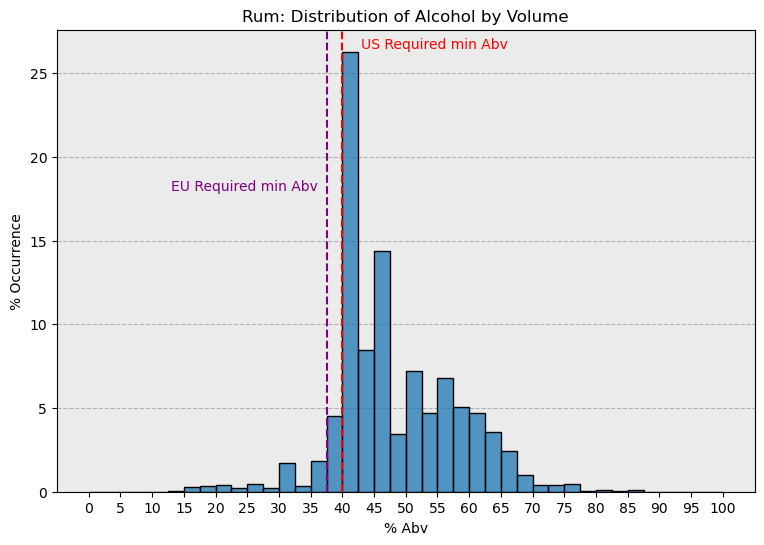

In [6]:
# basic Histogram plots - ABV
plt.figure(figsize=(9,6))

plt.axvline(x=40, color='red', ls='--')
plt.text(43, 26.5, 'US Required min Abv', color='red')
plt.axvline(x=37.5, color='Purple', ls='--')
plt.text(13, 18, 'EU Required min Abv', color='purple')

ax = sns.histplot(data = rum, x = 'Abv', stat='percent', binrange=(0,100), binwidth=2.5)
plt.xlabel("% Abv")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of Alcohol by Volume")
plt.xticks(range(0,105,5))

ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')

plt.show()

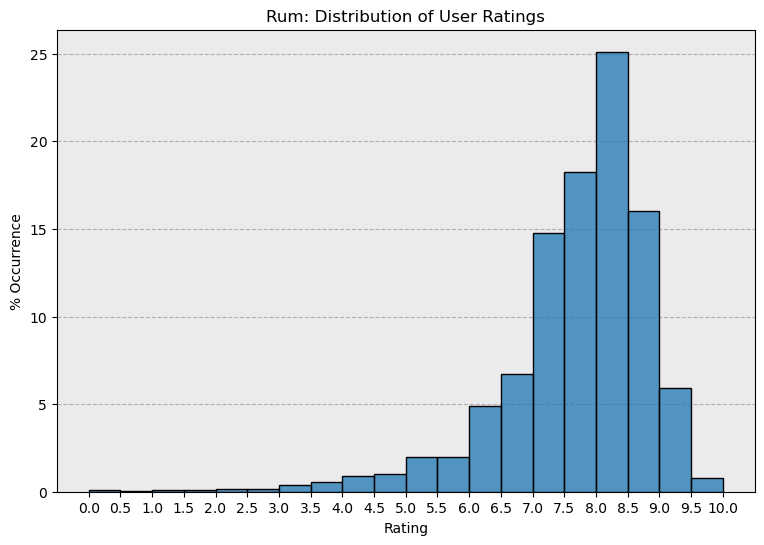

In [7]:
# basic Histogram plots - Rating
plt.figure(figsize=(9,6))

ax = sns.histplot(data = rum, x = 'Rating', binrange=(0,10), binwidth=0.5, stat = 'percent')
plt.xlabel("Rating")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of User Ratings")
plt.xticks(np.arange(0,10.5,0.5))

ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')

plt.show()

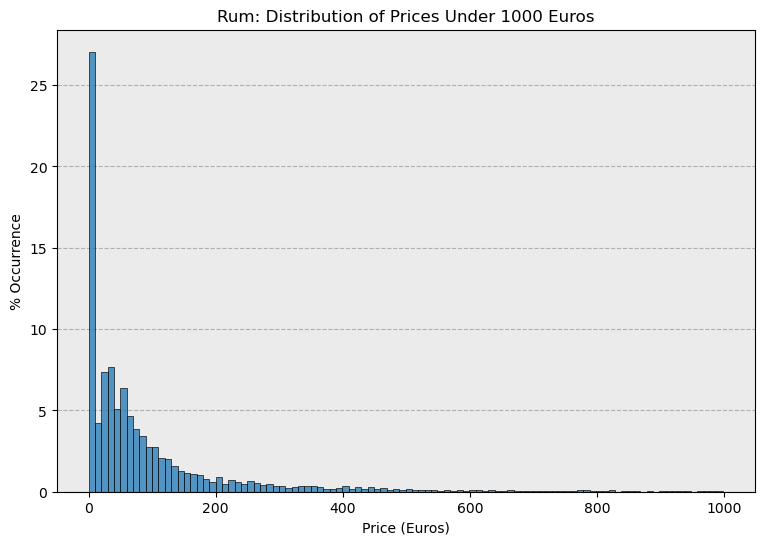

In [8]:
# basic Histogram plots - Price
plt.figure(figsize=(9,6))
ax = sns.histplot(data = rum[rum['Price'] <= 1000], x = 'Price', bins = 100, stat = 'percent')
plt.xlabel("Price (Euros)")
plt.ylabel("% Occurrence")
plt.title("Rum: Distribution of Prices Under 1000 Euros")
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_facecolor('#EBEBEB')
plt.show()

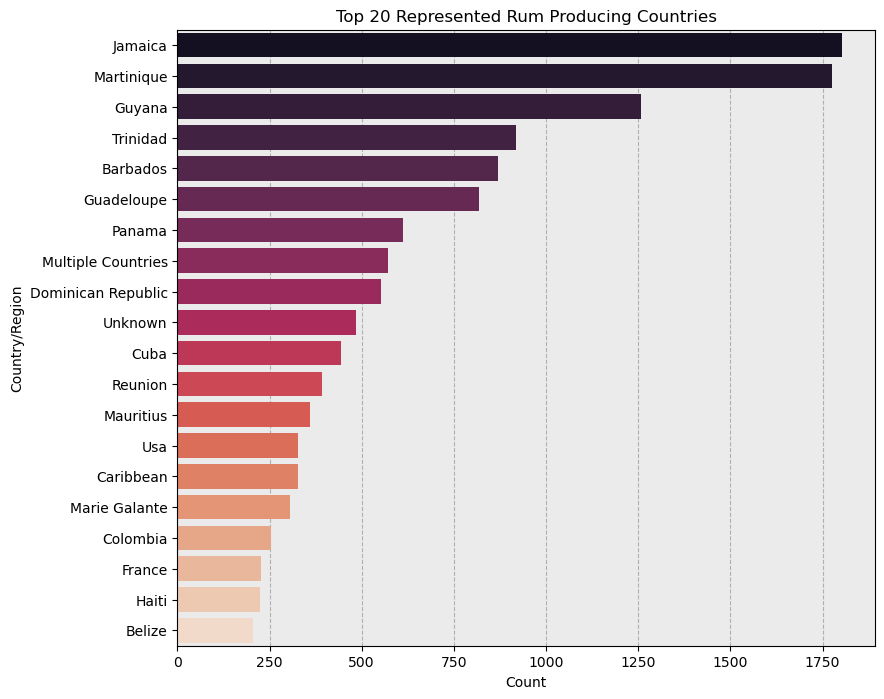

In [9]:
# basic bar chart for country
num_countries = 20

plt.figure(figsize=(9,8))
ax = sns.countplot(data = rum[rum['Country'].isin(list(rum['Country'].value_counts()[0:num_countries].index))],
                   orient = 'x',
                   y = 'Country', 
                   order = rum['Country'].value_counts().index[0:num_countries],
                  palette = 'rocket')
plt.xlabel("Count")
plt.ylabel("Country/Region")
plt.title(f"Top {num_countries} Represented Rum Producing Countries")

ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Country'].value_counts().index[0:num_countries]])

plt.show()

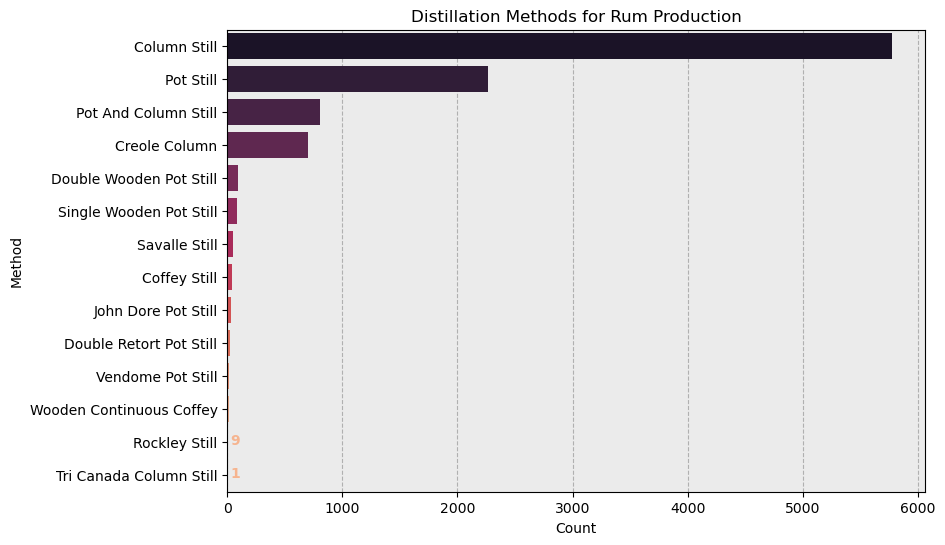

In [10]:
# basic bar chart for Distillation Methods
num_methods = 14

plt.figure(figsize=(9,6))
ax = sns.countplot(data = rum[rum['Distillation'].isin(list(rum['Distillation'].value_counts()[0:num_methods].index))],
                   orient = 'x',
                   y = 'Distillation', 
                   order = rum['Distillation'].value_counts().index[0:num_methods],
                  palette = 'rocket')
plt.xlabel("Count")
plt.ylabel("Method")
plt.title(f"Distillation Methods for Rum Production")
plt.text(25, 12.08, '9', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
plt.text(25, 13.08, '1', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Distillation'].value_counts().index[0:num_methods]])

plt.show()


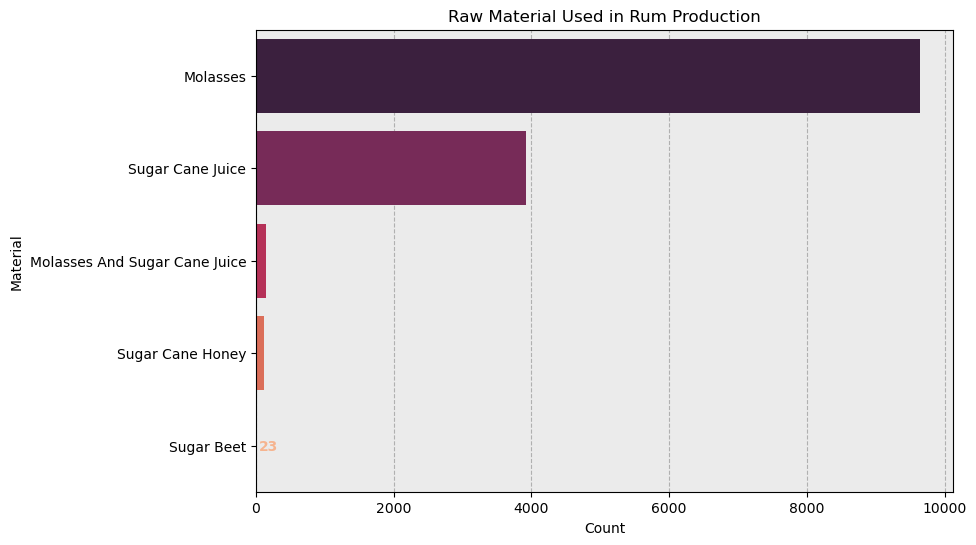

In [11]:
# basic bar chart for Raw Materials
num_materials = 5

plt.figure(figsize=(9,6))

ax = sns.countplot(data = rum[rum['Raw_Material'].isin(list(rum['Raw_Material'].value_counts()[0:num_materials].index))],
                   orient = 'x',
                   y = 'Raw_Material', 
                   order = rum['Raw_Material'].value_counts().index[0:num_materials],
                  palette = 'rocket')

plt.xlabel("Count")
plt.ylabel("Material")
plt.title(f"Raw Material Used in Rum Production")
plt.text(50, 4.055, '23', color = f'{sns.color_palette("rocket").as_hex()[5]}', fontweight='bold' )
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
ax.set_yticklabels([t.title() for t in rum['Raw_Material'].value_counts().index[0:num_materials]])

plt.show()

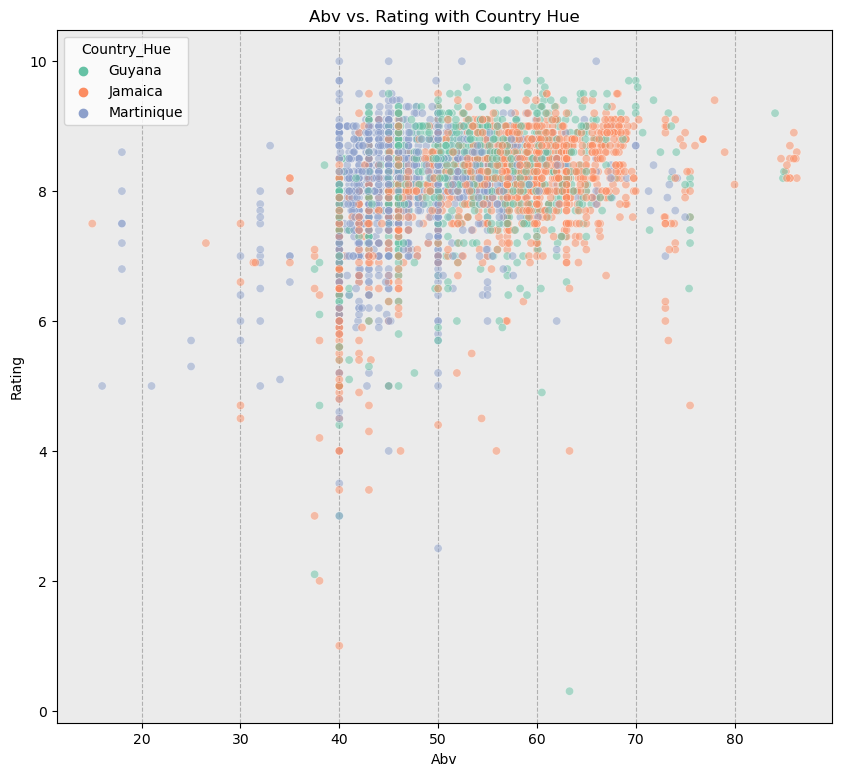

In [12]:
# scatter plots with hues
rum['Country_Hue'] = np.where(rum['Country'] == 'jamaica', 'Jamaica', 
                              np.where(rum['Country'] == 'martinique', 'Martinique', 
                                       np.where(rum['Country'] == 'guyana', 'Guyana', 'Other')))
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum[rum['Country_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Country_Hue', alpha = 0.5, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Country Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "upper left")
plt.show()
rum.drop(columns=['Country_Hue'] , inplace=True)

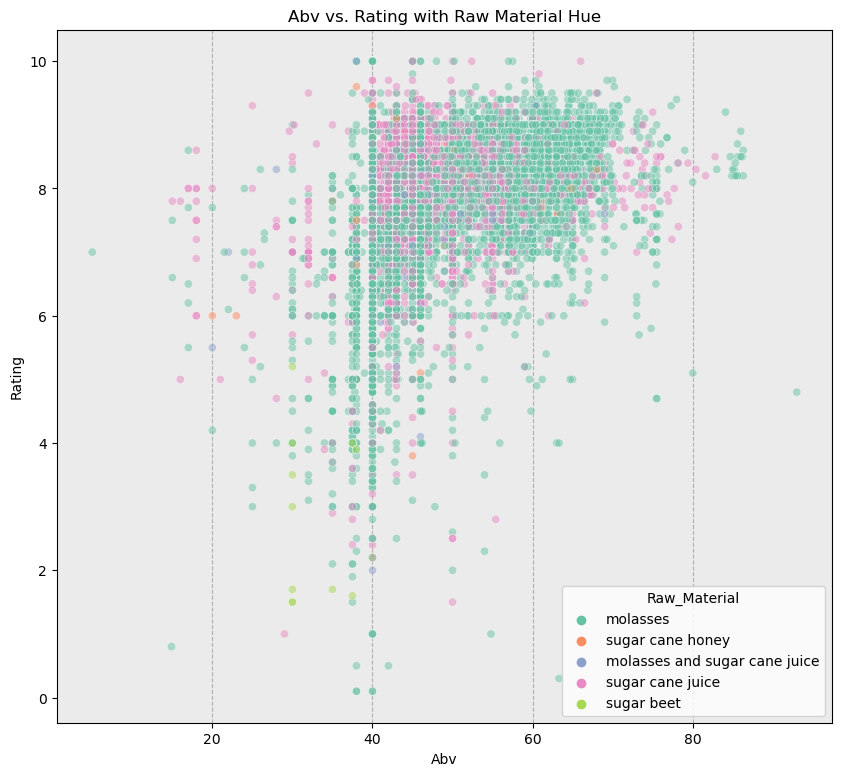

In [13]:
# scatter plots with hues
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum, x = x_ax, y = y_ax, hue='Raw_Material', alpha = 0.5, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Raw Material Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()

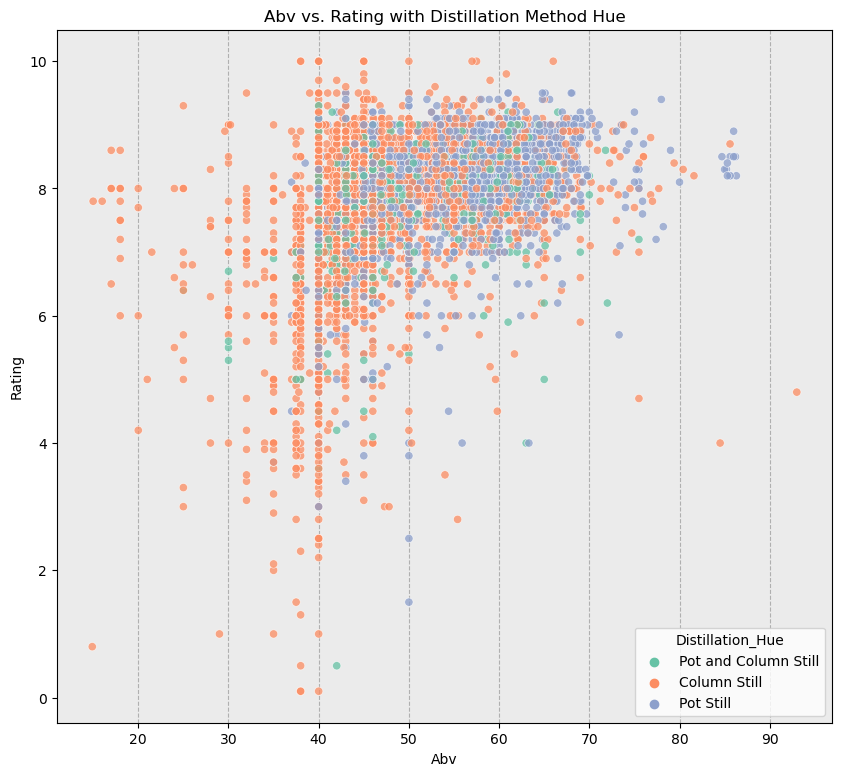

In [14]:
# scatter plots with hues
rum['Distillation_Hue'] = np.where(rum['Distillation'] == 'pot still', 'Pot Still', 
                                   np.where(rum['Distillation'] == 'column still', 'Column Still', 
                                            np.where(rum['Distillation'] == 'pot and column still', 'Pot and Column Still', 'Other')))
x_ax = 'Abv'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum[rum['Distillation_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Distillation_Hue', alpha = 0.75, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Distillation Method Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum.drop(columns=['Distillation_Hue'] , inplace=True)

In [15]:
# looking at price, subsetting to below 1000 euros
rum_filtered = pd.read_csv('rum.csv')
rum_filtered = rum_filtered[rum_filtered['Price'] <= 500]
rum_filtered = rum_filtered[rum_filtered['Price'] >= 10]
rum_filtered = rum_filtered[rum_filtered['Number_Reviews'] >= 10]

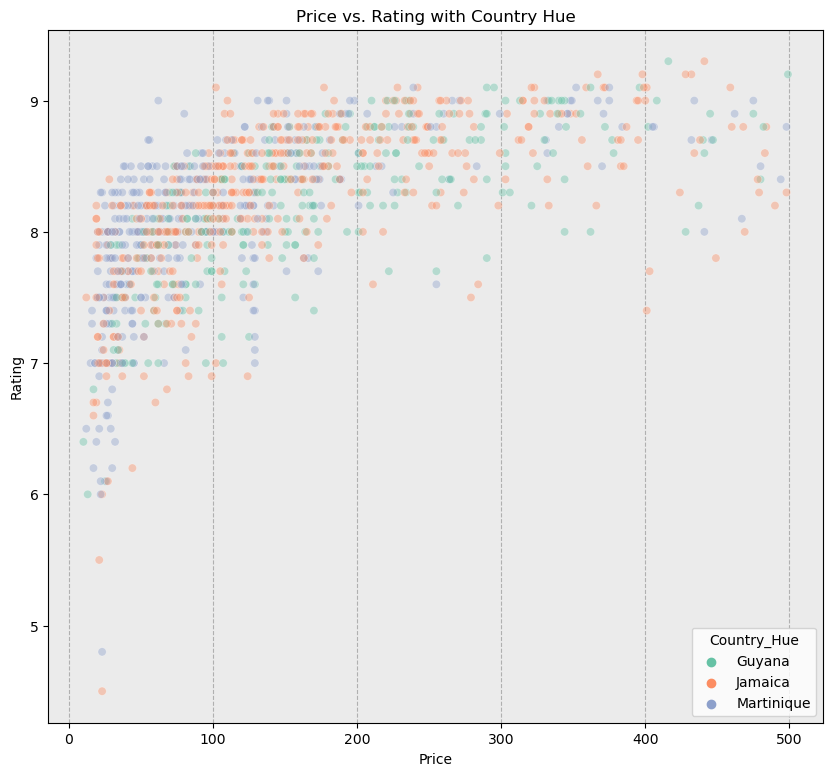

In [16]:
# scatter plots with hues
rum_filtered['Country_Hue'] = np.where(rum_filtered['Country'] == 'jamaica', 'Jamaica', 
                                           np.where(rum_filtered['Country'] == 'martinique', 'Martinique', 
                                                    np.where(rum_filtered['Country'] == 'guyana', 'Guyana', 'Other')))
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered[rum_filtered['Country_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Country_Hue', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Country Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum_filtered.drop(columns=['Country_Hue'] , inplace=True)

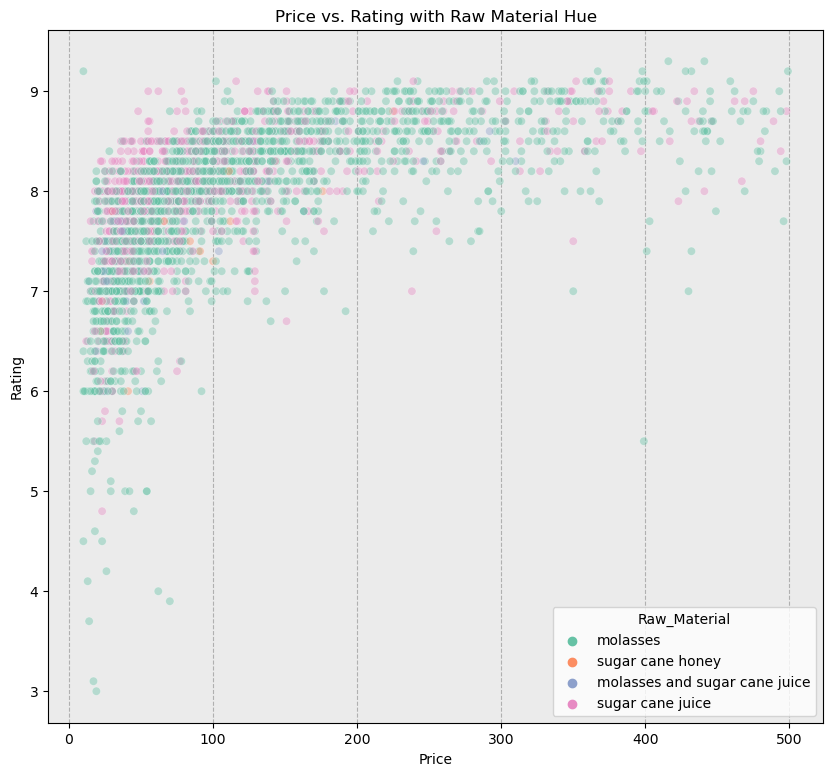

In [17]:
# scatter plots with hues
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered, x = x_ax, y = y_ax, hue='Raw_Material', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Raw Material Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()

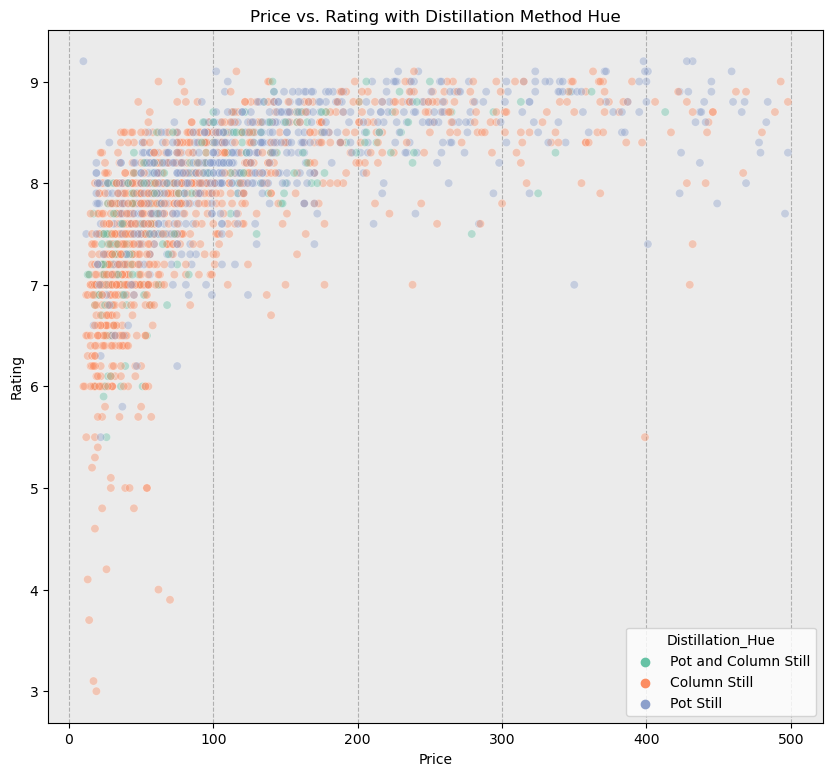

In [18]:
# scatter plots with hues
rum_filtered['Distillation_Hue'] = np.where(rum_filtered['Distillation'] == 'pot still', 'Pot Still', 
                                   np.where(rum_filtered['Distillation'] == 'column still', 'Column Still', 
                                            np.where(rum_filtered['Distillation'] == 'pot and column still', 'Pot and Column Still', 'Other')))
x_ax = 'Price'
y_ax = 'Rating'

plt.figure(figsize=(10,9))
ax = sns.scatterplot(data = rum_filtered[rum_filtered['Distillation_Hue'] != 'Other'], x = x_ax, y = y_ax, hue='Distillation_Hue', alpha = 0.4, palette = 'Set2')
plt.xlabel(f"{x_ax}")
plt.ylabel(f"{y_ax}")
plt.title(f"{x_ax} vs. {y_ax} with Distillation Method Hue")
ax.set_axisbelow(True)
ax.grid(axis='x', ls='--')
ax.set_facecolor('#EBEBEB')
sns.move_legend(ax, "lower right")
plt.show()
rum_filtered.drop(columns=['Distillation_Hue'] , inplace=True)

In [19]:
# testing co-occurence matrix, convert lists embedded in strings into lists
rum_tasting = pd.read_csv('rum.csv')
rum_tasting = rum_tasting[~pd.isna(rum_tasting['Taste_Notes'])]
rum_tasting['Taste_Notes'] = [eval(l) for l in rum_tasting['Taste_Notes']]

In [23]:
# counting all tasting notes and their counts
tastes = defaultdict(int)
num_tastes = 18

for l in rum_tasting['Taste_Notes']:
    for t in l:
        tastes[t] += 1
        
tastes = dict(tastes)
tastes = {k:v for k,v in sorted(tastes.items(), key = lambda x:x[1], reverse=True)}
topX = list(tastes.keys())[0:num_tastes] + ['vegetal', 'herbal']

In [24]:
# https://stackoverflow.com/questions/53850559/construct-co-occurrence-matrix-from-a-list-of-list-in-python
u = (pd.get_dummies(pd.DataFrame(list(rum_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0

In [25]:
# Filter v into a reasonable amount of features
v_topX = v.loc[v.index.isin(topX), v.columns.isin(topX)]
v_topX

,alcoholic,banana,barrel,caramel,dark chocolate,dried fruit,dry,fruity,herbal,oak,peppery,roasted,spice,spicy,sugarcane,sweet,tropical fruit,vanilla,vegetal,woody
alcoholic,0,90,123,200,78,116,99,184,46,104,127,112,154,220,81,1,130,84,57,113
banana,90,0,92,172,67,74,99,148,40,135,101,122,139,151,53,203,22,106,36,80
barrel,123,92,0,248,103,174,102,150,56,140,100,187,160,191,42,182,141,132,36,91
caramel,200,172,248,0,27,107,122,28,67,84,167,42,50,94,63,49,231,154,41,27
dark chocolate,78,67,103,27,0,194,59,122,27,159,57,154,119,146,38,4,94,164,21,150
dried fruit,116,74,174,107,194,0,146,189,54,217,136,17,7,239,78,18,133,73,62,207
dry,99,99,102,122,59,146,0,129,44,149,136,98,146,173,105,130,125,31,78,127
fruity,184,148,150,28,122,189,129,0,72,159,196,144,35,85,205,165,229,23,166,156
herbal,46,40,56,67,27,54,44,72,0,43,71,54,63,109,78,70,67,123,66,182
oak,104,135,140,84,159,217,149,159,43,0,126,242,167,213,70,6,134,101,38,118


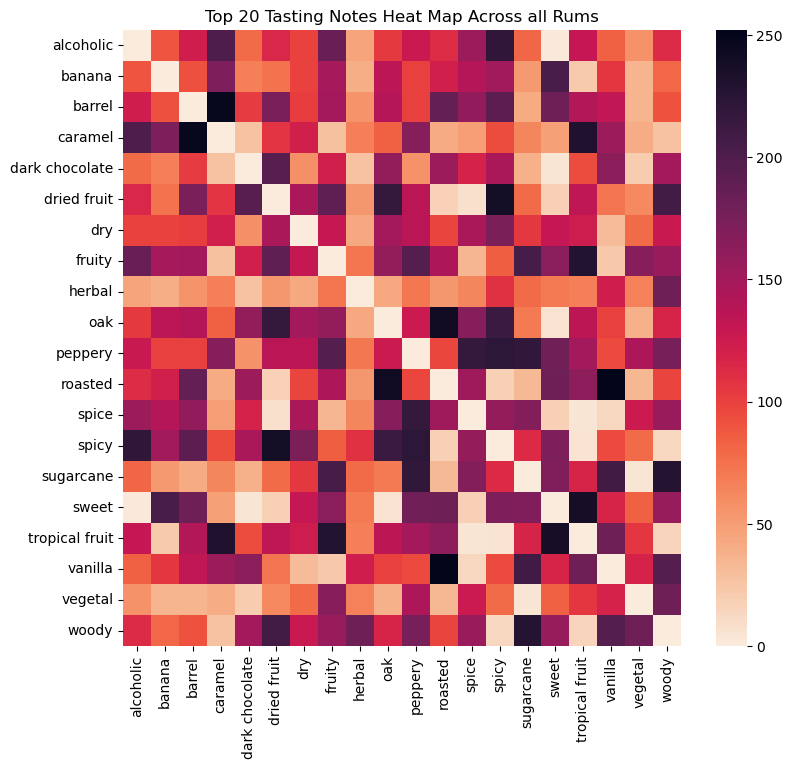

In [34]:
# lower triangular heat map
plt.figure(figsize=(9,8))
#mask = np.triu(np.ones_like(v_topX, dtype=bool))
#sns.heatmap(v_top25, mask=mask, cmap = 'flare')
sns.heatmap(v_topX, cmap = 'rocket_r')
plt.title(f"Top {num_tastes + 2} Tasting Notes Heat Map Across all Rums")
plt.show()

In [29]:
# getting heatmaps for 4 select countries
jamaica_tasting = rum_tasting[rum_tasting['Country'] == 'jamaica']
martinique_tasting = rum_tasting[rum_tasting['Country'] == 'martinique']
guyana_tasting = rum_tasting[rum_tasting['Country'] == 'guyana']
barbados_tasting = rum_tasting[rum_tasting['Country'] == 'barbados']

# jamaica
u_J = (pd.get_dummies(pd.DataFrame(list(jamaica_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_J = u_J.T.dot(u_J)
v_J.values[(np.r_[:len(v_J)], ) * 2] = 0
j_topX = v_J.loc[v_J.index.isin(topX), v_J.columns.isin(topX)]

# martinique
u_M = (pd.get_dummies(pd.DataFrame(list(martinique_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_M = u_M.T.dot(u_M)
v_M.values[(np.r_[:len(v_M)], ) * 2] = 0
m_topX = v_M.loc[v_M.index.isin(topX), v_M.columns.isin(topX)]

# guyana
u_G = (pd.get_dummies(pd.DataFrame(list(guyana_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_G = u_G.T.dot(u_G)
v_G.values[(np.r_[:len(v_G)], ) * 2] = 0
g_topX = v_G.loc[v_G.index.isin(topX), v_G.columns.isin(topX)]

# barbados
u_B = (pd.get_dummies(pd.DataFrame(list(barbados_tasting['Taste_Notes'])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
v_B = u_B.T.dot(u_B)
v_B.values[(np.r_[:len(v_B)], ) * 2] = 0
b_topX = v_B.loc[v_B.index.isin(topX), v_B.columns.isin(topX)]

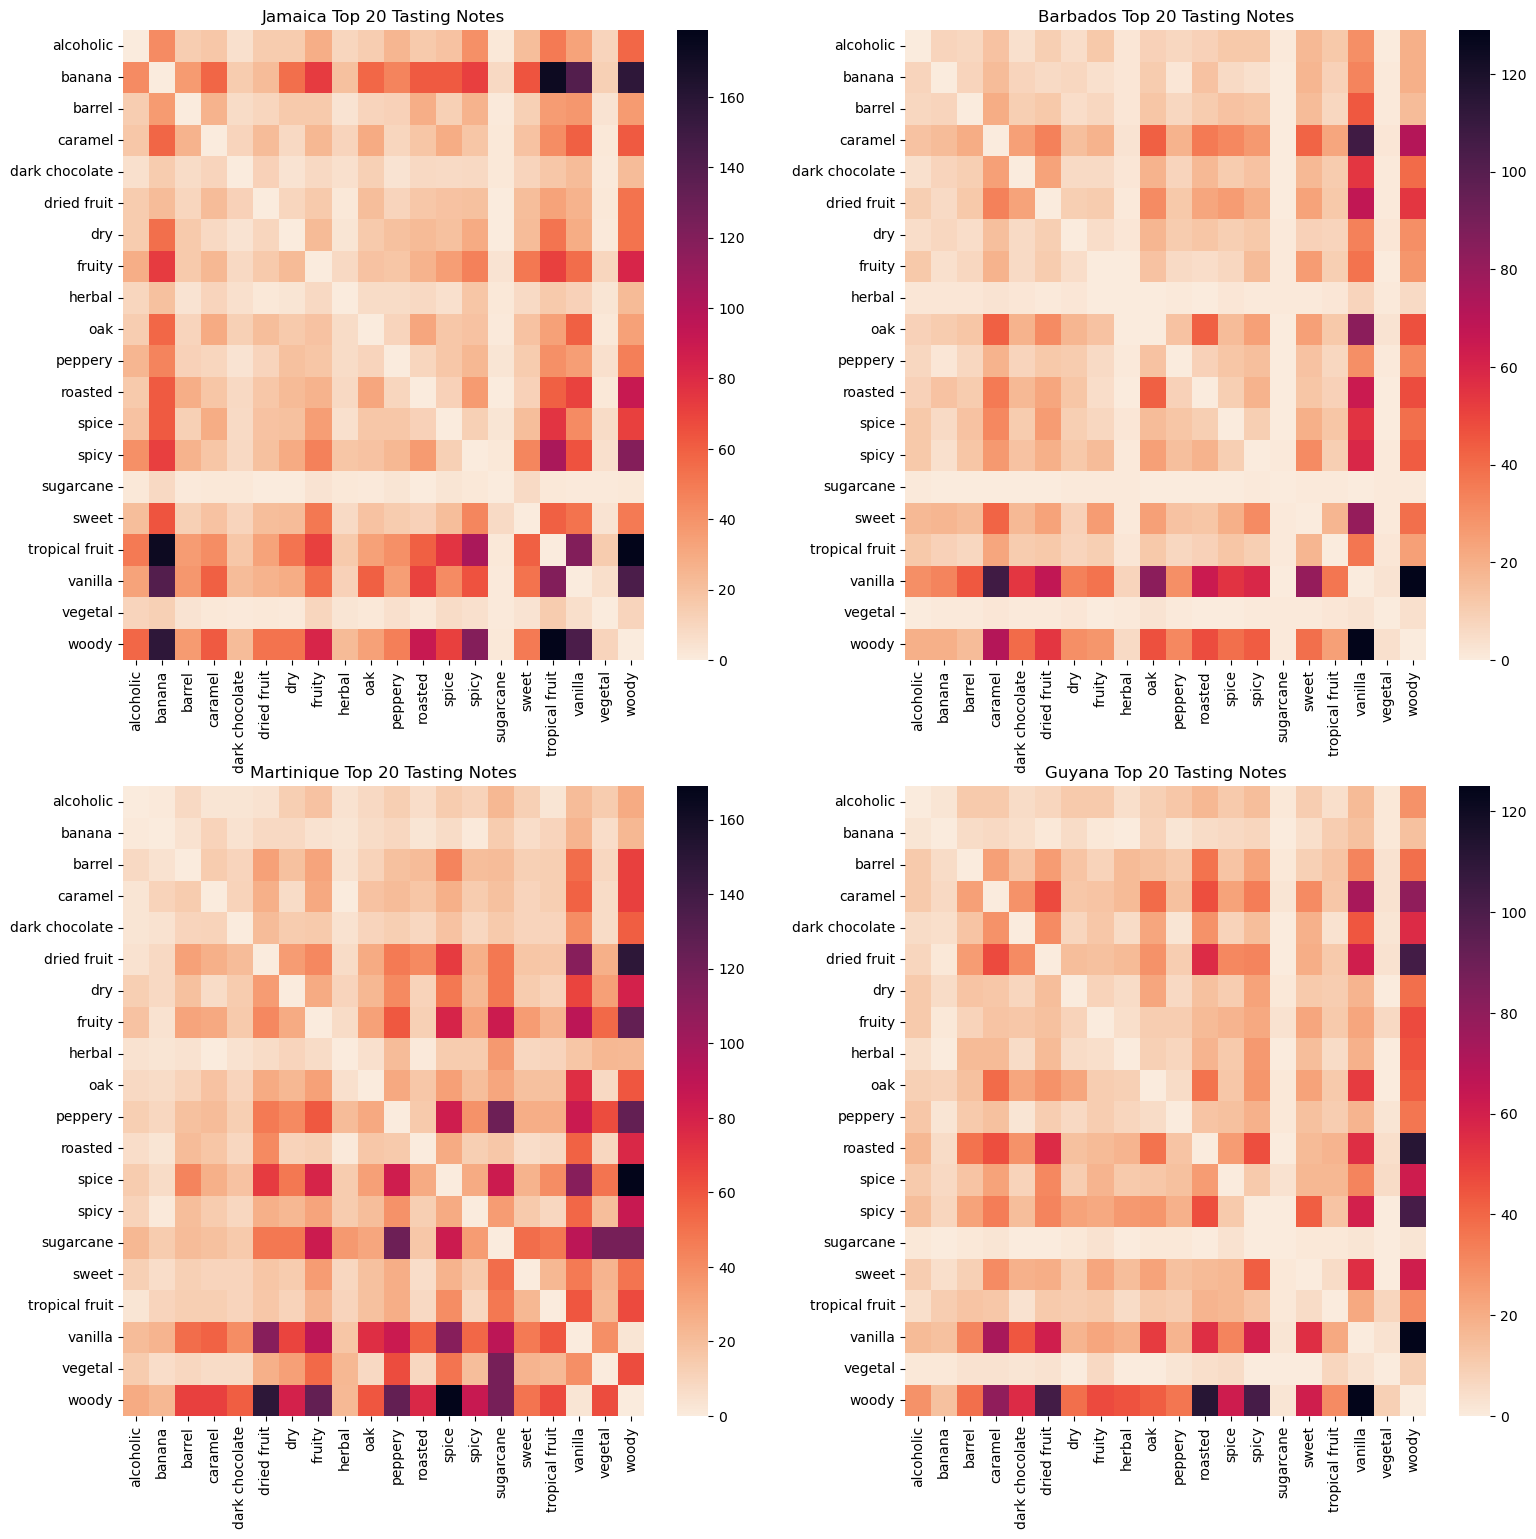

In [33]:
#
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Jamaica
sns.heatmap(j_topX, ax=axes[0,0], cmap = 'rocket_r')
axes[0,0].set_title(f'Jamaica Top {num_tastes + 2} Tasting Notes')

# Barbados
sns.heatmap(b_topX, ax=axes[0,1], cmap = 'rocket_r')
axes[0,1].set_title(f'Barbados Top {num_tastes + 2} Tasting Notes')

# Martinique
sns.heatmap(m_topX, ax=axes[1,0], cmap = 'rocket_r')
axes[1,0].set_title(f'Martinique Top {num_tastes + 2} Tasting Notes')

# Guyana
sns.heatmap(g_topX, ax=axes[1,1], cmap = 'rocket_r')
axes[1,1].set_title(f'Guyana Top {num_tastes + 2} Tasting Notes')

plt.show()

In [119]:
# building a custom function to tastes

def heatMap(country='jamaica', number_notes=20, attr_='Taste_Notes'):
    
    assert country in list(rum['Country'].unique()), f'{country} is not a valid country'
    assert attr_ in ['Taste_Notes', 'Smell_Notes', 'Finish_Notes'], f"Must choose between 'Taste_Notes', 'Smell_Notes', 'Finish_Notes'"
    assert number_notes >= 5 and number_notes <= 30, 'Pick a number between 5 and 30 inclusive'
    
    # load tasting df
    rum_tasting = pd.read_csv('rum.csv')
    
    # subset df based on attr_
    rum_tasting = rum_tasting[~pd.isna(rum_tasting[attr_])]
    rum_tasting[attr_] = [eval(l) for l in rum_tasting[attr_]]
    
    # get top notes for specific country
    country_tasting = rum_tasting[rum_tasting['Country'] == country]
    
    # get the top notes for chosen country
    tastes = defaultdict(int)
    num_tastes = number_notes

    for l in country_tasting[attr_]:
        for t in l:
            tastes[t] += 1

    tastes = dict(tastes)
    tastes = {k:v for k,v in sorted(tastes.items(), key = lambda x:x[1], reverse=True)}
    topX = list(tastes.keys())[0:num_tastes]
   
    u = (pd.get_dummies(pd.DataFrame(list(rum_tasting[attr_])), prefix='', prefix_sep='')
           .groupby(level=0, axis=1)
           .sum())
    v = u.T.dot(u)
    v.values[(np.r_[:len(v)], ) * 2] = 0
    
    v_topX = v.loc[v.index.isin(topX), v.columns.isin(topX)]
    
    
    
    u_X = (pd.get_dummies(pd.DataFrame(list(country_tasting[attr_])), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
    v_X = u_X.T.dot(u_X)
    v_X.values[(np.r_[:len(v_X)], ) * 2] = 0
    X_topX = v_X.loc[v_X.index.isin(topX), v_X.columns.isin(topX)]
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # plot the specific country data
    sns.heatmap(X_topX, ax=axes[0], cmap = 'rocket_r')
    axes[0].set_title(f'Top {number_notes} {attr_}: {country.title()}')
            
    # plot all rum data
    sns.heatmap(v_topX, ax=axes[1], cmap = 'rocket_r')
    axes[1].set_title(f'Top {number_notes} {attr_}: All Rums')
    
    

    
    plt.show()
    
    
    

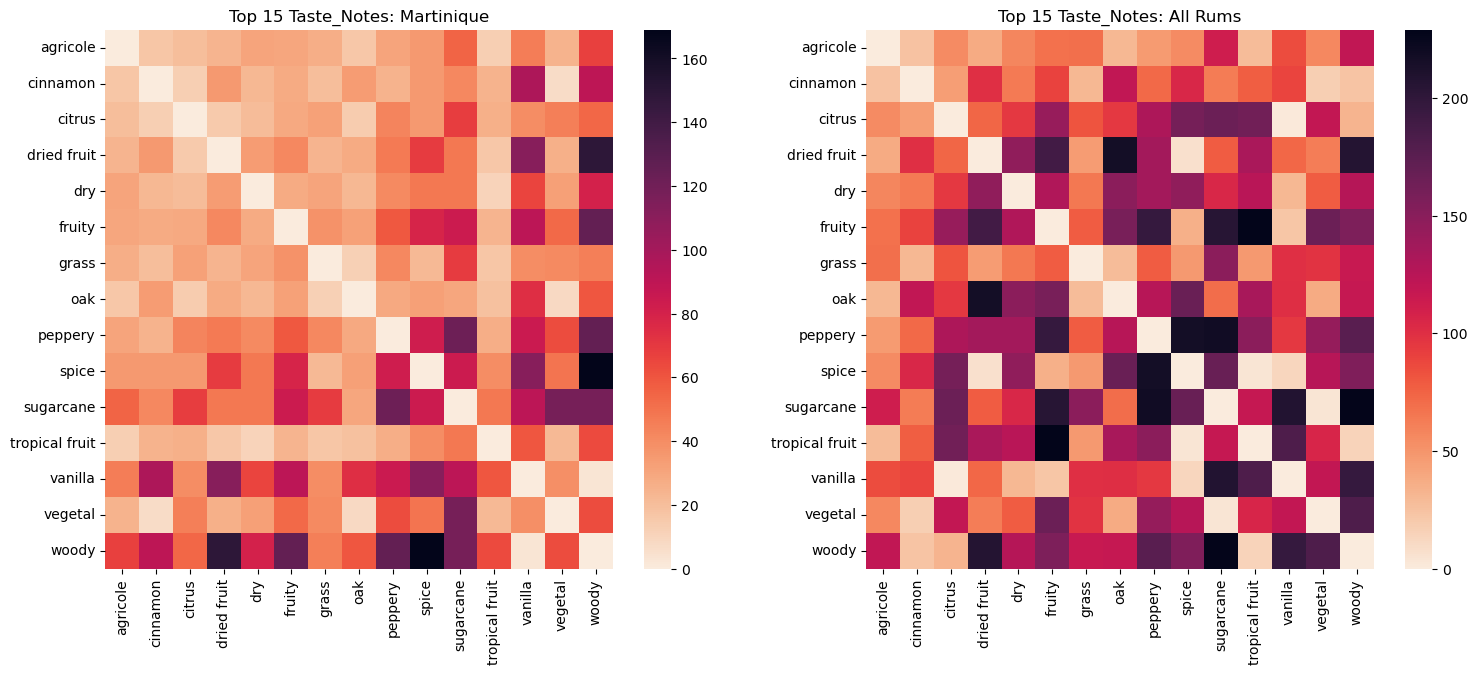

In [130]:
heatMap(country='martinique', attr_='Taste_Notes', number_notes=15)